### Importing the EIA module

In [1]:
import eia

### Importing libraries for Data Visualization

In [2]:
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Loading Data using the eia.loaders.load_dataframe method
We will analyze the 'state-electricity-profiles-emissions-by-state-by-fuel' file and try to find some interesting insights from the data.

In [5]:
df = eia.loaders.load_dataframe(data='state-electricity-profiles-emissions-by-state-by-fuel')

/Users/priyanshbhatnagar/data/eia-py/data/state-electricity-profiles/csv/emissions-by-state-by-fuel_data.csv


In [6]:
df.head()

,Unnamed: 0,period,stateid,stateDescription,fuelid,fuelDescription,so2-rate-lbs-mwh,so2-short-tons,nox-rate-lbs-mwh,nox-short-tons,co2-rate-lbs-mwh,co2-thousand-metric-tons,so2-rate-lbs-mwh-units,so2-short-tons-units,nox-rate-lbs-mwh-units,nox-short-tons-units,co2-rate-lbs-mwh-units,co2-thousand-metric-tons-units
0,0,2010,AL,Alabama,ALL,Total,3.2,240198,1.0,72961,1148.0,79375,pounds per megawatthour,short tons,pounds per megawatthour,short tons,pounds per megawatthour,thousand metric tons
1,1,2006,AL,Alabama,COL,Coal,NaN,474527,NaN,120703,NaN,76742,pounds per megawatthour,short tons,pounds per megawatthour,short tons,pounds per megawatthour,thousand metric tons
2,2,2006,AL,Alabama,NG,Natural Gas,NaN,47,NaN,5945,NaN,8990,pounds per megawatthour,short tons,pounds per megawatthour,short tons,pounds per megawatthour,thousand metric tons
3,3,2006,AL,Alabama,OTH,Other,NaN,28399,NaN,7635,NaN,24,pounds per megawatthour,short tons,pounds per megawatthour,short tons,pounds per megawatthour,thousand metric tons
4,4,2006,AL,Alabama,PET,Petroleum,NaN,1340,NaN,507,NaN,398,pounds per megawatthour,short tons,pounds per megawatthour,short tons,pounds per megawatthour,thousand metric tons


In [79]:
df.loc[0]

Unnamed: 0                                              0
period                                               2010
stateid                                                AL
stateDescription                                  Alabama
fuelid                                                ALL
fuelDescription                                     Total
so2-rate-lbs-mwh                                      3.2
so2-short-tons                                     240198
nox-rate-lbs-mwh                                      1.0
nox-short-tons                                      72961
co2-rate-lbs-mwh                                   1148.0
co2-thousand-metric-tons                            79375
so2-rate-lbs-mwh-units            pounds per megawatthour
so2-short-tons-units                           short tons
nox-rate-lbs-mwh-units            pounds per megawatthour
nox-short-tons-units                           short tons
co2-rate-lbs-mwh-units            pounds per megawatthour
co2-thousand-m

In [7]:
df['period'].unique()

array([2010, 2006, 1997, 1992, 2015, 1995, 1996, 1994, 2017, 2018, 1999,
       1991, 2002, 1998, 2020, 2001, 2014, 2005, 2009, 2004, 1993, 2000,
       1990, 2007, 2011, 2016, 2013, 2003, 2008, 2012])

In [18]:
df['period'][0] == 2010

True

In [8]:
df['stateid'].unique()

array(['AL', 'AR', 'CT', 'DC', 'DE', 'FL', 'AZ', 'CA', 'CO', 'AK', 'GA',
       'IA', 'ID', 'IL', 'LA', 'MA', 'MD', 'IN', 'KS', 'KY', 'HI', 'ME',
       'MN', 'MO', 'MS', 'ND', 'NE', 'NH', 'NJ', 'MT', 'NC', 'MI', 'NV',
       'NY', 'OH', 'RI'], dtype=object)

In [9]:
len(df['stateid'].unique())

36

In [10]:
df['stateDescription'].unique()

array(['Alabama', 'Arkansas', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Arizona', 'California', 'Colorado',
       'Alaska', 'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Louisiana',
       'Massachusetts', 'Maryland', 'Indiana', 'Kansas', 'Kentucky',
       'Hawaii', 'Maine', 'Minnesota', 'Missouri', 'Mississippi',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey',
       'Montana', 'North Carolina', 'Michigan', 'Nevada', 'New York',
       'Ohio', 'Rhode Island'], dtype=object)

In [12]:
df['fuelDescription'].unique()

array(['Total', 'Coal', 'Natural Gas', 'Other', 'Petroleum'], dtype=object)

### Let's study the SO2, NOX and CO2 emissions for the fuel : Total.
### We will analyze the data for each state from the year 1990 to 2020.

In [35]:
emissions_per_state = {}
for entry in df.values:
    if entry[1] == 2020 and entry[5] == 'Total':
        emissions_per_state[entry[2]] = (entry[7], entry[9], entry[11])

In [80]:
emissions_per_state

{'AR': (32170, 17459, 23504),
 'DC': (1, 578, 108),
 'DE': (294, 1473, 2675),
 'FL': (38651, 53264, 96975),
 'AZ': (8271, 28101, 35791),
 'CA': (1534, 72902, 43440),
 'CO': (9095, 18934, 29113),
 'CT': (491, 6271, 10215),
 'AK': (2441, 21774, 3527),
 'AL': (28757, 22882, 44895),
 'IA': (19110, 19203, 21164),
 'ID': (3931, 4766, 2230),
 'LA': (27489, 59819, 44525),
 'MA': (1950, 8187, 7978),
 'IL': (62029, 27738, 47595),
 'IN': (38145, 60861, 64884),
 'KS': (4010, 14877, 20363),
 'KY': (40591, 31024, 49825),
 'GA': (46548, 35621, 39957),
 'HI': (17215, 16437, 6650),
 'MD': (3507, 5995, 10241),
 'MN': (14089, 19905, 20986),
 'MO': (92293, 53141, 54206),
 'MS': (12437, 17422, 26815),
 'NE': (40513, 19988, 20967),
 'NH': (338, 1555, 1734),
 'NJ': (2759, 9509, 14942),
 'MT': (7457, 10361, 10421),
 'NC': (33254, 41914, 38542),
 'ND': (34986, 31359, 27437),
 'ME': (6598, 5639, 1831),
 'MI': (44831, 64440, 53285),
 'NV': (2099, 10661, 13584),
 'NY': (7590, 28459, 26849),
 'OH': (92723, 54714, 

In [113]:
df.values[0]

array([0, 2010, 'AL', 'Alabama', 'ALL', 'Total', 3.2, 240198, 1.0, 72961,
       1148.0, 79375, 'pounds per megawatthour', 'short tons',
       'pounds per megawatthour', 'short tons', 'pounds per megawatthour',
       'thousand metric tons'], dtype=object)

In [116]:
df.keys

<bound method NDFrame.keys of       Unnamed: 0  period stateid stateDescription fuelid fuelDescription  \
0              0    2010      AL          Alabama    ALL           Total   
1              1    2006      AL          Alabama    COL            Coal   
2              2    2006      AL          Alabama     NG     Natural Gas   
3              3    2006      AL          Alabama    OTH           Other   
4              4    2006      AL          Alabama    PET       Petroleum   
...          ...     ...     ...              ...    ...             ...   
4995        4995    1995      RI     Rhode Island    OTH           Other   
4996        4996    1995      RI     Rhode Island    PET       Petroleum   
4997        4997    1995      RI     Rhode Island    ALL           Total   
4998        4998    2010      RI     Rhode Island     NG     Natural Gas   
4999        4999    2010      RI     Rhode Island    OTH           Other   

      so2-rate-lbs-mwh  so2-short-tons  nox-rate-lbs-mwh 

### SO2 Emissions

In [125]:
so2 = {}
for year in df['period'].unique():
    d = {}
    for i in df.values:
        if i[1] == year and i[5] == 'Total':
            d[i[2]] = i[7]
    so2[year] = d

In [127]:
so2[2010]

{'AL': 240198,
 'AR': 81635,
 'CT': 2241,
 'DC': 878,
 'DE': 14497,
 'AZ': 36785,
 'CA': 2787,
 'CO': 49468,
 'AK': 3323,
 'FL': 176148,
 'IA': 118977,
 'ID': 7322,
 'LA': 138677,
 'MA': 38512,
 'MD': 49703,
 'IL': 255225,
 'IN': 424340,
 'KS': 45250,
 'KY': 274218,
 'GA': 291864,
 'HI': 18459,
 'ME': 13694,
 'MO': 256617,
 'ND': 127472,
 'NE': 71512,
 'NH': 37267,
 'MS': 65086,
 'MT': 24285,
 'NC': 144051,
 'MI': 279790,
 'MN': 62382,
 'NJ': 15382,
 'NV': 7894,
 'NY': 68040,
 'OH': 672677}

In [44]:
layout = dict(geo = {'scope':'usa'})

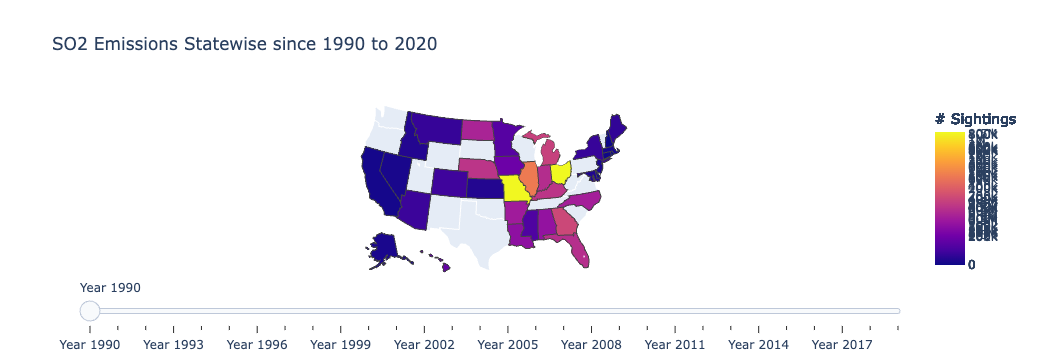

In [133]:
year = 1990


# scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
#        [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in sorted(df['period'].unique()):

    data_each_yr = dict(
                        type='choropleth',
                        locations = list(so2[year].keys()),
                        z=list(so2[year].values()),
                        locationmode='USA-states',
                        # colorscale = scl,
                        colorbar= {'title':'# Sightings'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1990))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='SO2 Emissions Statewise since 1990 to 2020', geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
po.iplot(fig)


### NOX Emissions

In [134]:
nox = {}
for year in df['period'].unique():
    d = {}
    for i in df.values:
        if i[1] == year and i[5] == 'Total':
            d[i[2]] = i[9]
    nox[year] = d

In [136]:
nox[2020]

{'AR': 17459,
 'DC': 578,
 'DE': 1473,
 'FL': 53264,
 'AZ': 28101,
 'CA': 72902,
 'CO': 18934,
 'CT': 6271,
 'AK': 21774,
 'AL': 22882,
 'IA': 19203,
 'ID': 4766,
 'LA': 59819,
 'MA': 8187,
 'IL': 27738,
 'IN': 60861,
 'KS': 14877,
 'KY': 31024,
 'GA': 35621,
 'HI': 16437,
 'MD': 5995,
 'MN': 19905,
 'MO': 53141,
 'MS': 17422,
 'NE': 19988,
 'NH': 1555,
 'NJ': 9509,
 'MT': 10361,
 'NC': 41914,
 'ND': 31359,
 'ME': 5639,
 'MI': 64440,
 'NV': 10661,
 'NY': 28459,
 'OH': 54714}

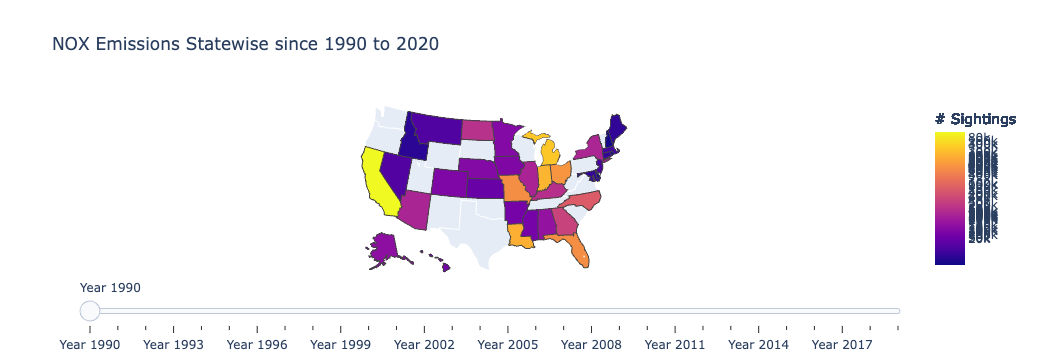

In [137]:
year = 1990


# scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
#        [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in sorted(df['period'].unique()):

    data_each_yr = dict(
                        type='choropleth',
                        locations = list(nox[year].keys()),
                        z=list(nox[year].values()),
                        locationmode='USA-states',
                        # colorscale = scl,
                        colorbar= {'title':'# Sightings'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1990))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='NOX Emissions Statewise since 1990 to 2020', geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
po.iplot(fig)

### CO2 Emissions

In [141]:
co2 = {}
for year in df['period'].unique():
    d = {}
    for i in df.values:
        if i[1] == year and i[5] == 'Total':
            d[i[2]] = i[11]
    co2[year] = d

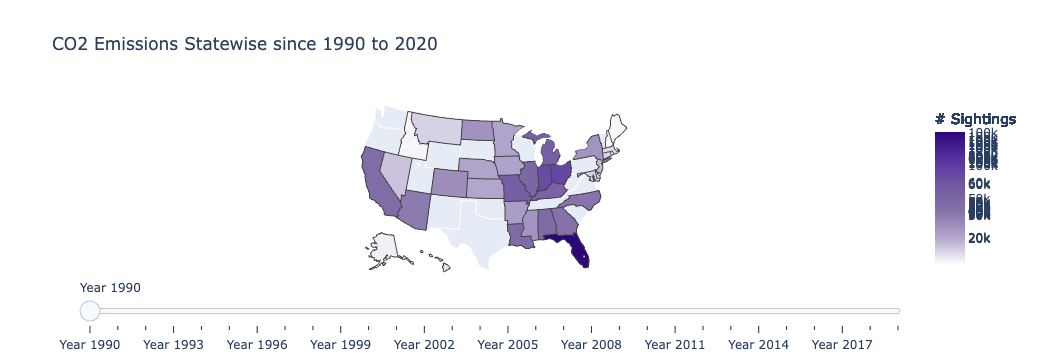

In [142]:
year = 1990


scl = [[0.0, '#ffffff'],[0.2, '#b4a8ce'],[0.4, '#8573a9'],
       [0.6, '#7159a3'],[0.8, '#5732a1'],[1.0, '#2c0579']] # purples

data_slider = []
for year in sorted(df['period'].unique()):

    data_each_yr = dict(
                        type='choropleth',
                        locations = list(co2[year].keys()),
                        z=list(co2[year].values()),
                        locationmode='USA-states',
                        colorscale = scl,
                        colorbar= {'title':'# Sightings'})

    data_slider.append(data_each_yr)

steps = []
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 1990))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(title ='CO2 Emissions Statewise since 1990 to 2020', geo=dict(scope='usa',
                       projection={'type': 'albers usa'}),
              sliders=sliders)

fig = dict(data=data_slider, layout=layout)
po.iplot(fig)